In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

In [ ]:
# Скачиваем данные для обучения:
training_data = datasets.MNIST(
    root="./dataset",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# Скачиваем данные для теста:
test_data = datasets.MNIST(
    root="./dataset",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.8MB/s]


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.28MB/s]


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.9MB/s]


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.39MB/s]

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



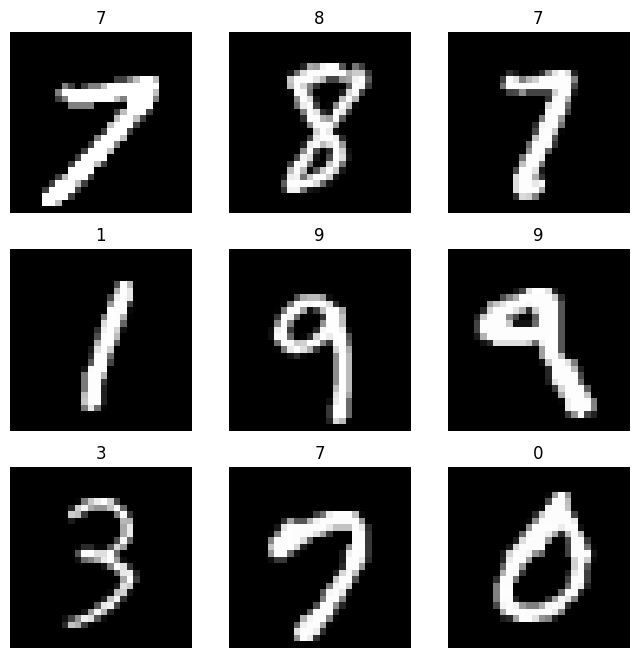

In [ ]:
import matplotlib.pyplot as plt

# Опишем название классов:
labels_map = ['0','1','2','3','4','5','6','7','8','9']

# Визуализируем рандомные сэмплы из MNIST:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") # squeeze() - удаляем все измерения размером 1
plt.show()

In [ ]:
batch_size = 64

# Создаем data loaders:
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape o

In [ ]:
# Выбираем девайс (cpu или gpu), на котором будут происходит вычисления:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
input_size = 28 * 28
num_classes = 10

## Базовая модель - вариант 1
model_LR = nn.Linear(input_size, num_classes)
print(model_LR.weight.shape)
print(model_LR.weight)
print(model_LR.bias.shape)
print(model_LR.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0278, -0.0103,  0.0208,  ..., -0.0248,  0.0120, -0.0236],
        [ 0.0287,  0.0103,  0.0234,  ...,  0.0047,  0.0087,  0.0094],
        [ 0.0069, -0.0120,  0.0134,  ...,  0.0160,  0.0023, -0.0200],
        ...,
        [-0.0240,  0.0336,  0.0125,  ..., -0.0012, -0.0356, -0.0130],
        [-0.0120, -0.0013,  0.0018,  ..., -0.0114, -0.0218, -0.0082],
        [-0.0304, -0.0100, -0.0230,  ...,  0.0091,  0.0352, -0.0046]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0274,  0.0039, -0.0185, -0.0042,  0.0285,  0.0283,  0.0075,  0.0181,
         0.0281, -0.0152], requires_grad=True)


In [ ]:
print(model_LR)

Linear(in_features=784, out_features=10, bias=True)


In [ ]:
# Базовая модель - вариант 2
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model_LR2 = MnistModel()
print(model_LR2.linear.weight.shape, model_LR2.linear.bias.shape)
list(model_LR2.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0317,  0.0249,  0.0283,  ..., -0.0341,  0.0290,  0.0178],
         [ 0.0304,  0.0191, -0.0221,  ..., -0.0104,  0.0355,  0.0271],
         [ 0.0206,  0.0297, -0.0327,  ..., -0.0216,  0.0339, -0.0034],
         ...,
         [ 0.0061, -0.0185, -0.0064,  ...,  0.0203, -0.0325,  0.0319],
         [-0.0124, -0.0080,  0.0320,  ..., -0.0253,  0.0289,  0.0118],
         [-0.0279, -0.0284,  0.0278,  ...,  0.0045, -0.0122,  0.0030]],
        requires_grad=True),
 Parameter containing:
 tensor([-9.4441e-03,  1.4814e-03, -3.2465e-02,  2.7977e-02, -2.6432e-02,
         -2.6045e-03, -2.0431e-02, -5.2501e-03, -2.0044e-02, -5.5522e-05],
        requires_grad=True)]

In [ ]:
model_LR2 = MnistModel().to(device)
print(model_LR2)

MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
# Определяем кастомную модель (Sequential) - вариант 1:
class NeuralNetworkSeq(nn.Module):
    def __init__(self, input_size=(28,28,1), output_size=10):
        super(NeuralNetworkSeq, self).__init__()
        self.flatten = nn.Flatten()
        self.output = nn.Linear(128, output_size)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size[0]*input_size[1]*input_size[2], 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            self.output
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model_seq = NeuralNetworkSeq().to(device)
print(model_seq)

NeuralNetworkSeq(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Определяем кастомную модель - вариант 2:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size=(28,28,1), output_size=10):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size[0]*input_size[1]*input_size[2], 128)
        self.fc2 = nn.Linear(128, 128)
        self.relu = nn.ReLU(inplace=True)
        self.output = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        logits = self.output(x)

        return logits


model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (relu): ReLU(inplace=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Вспомогательная функция для визуализации данных:
def show(img, title=''):
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
    plt.show()

Ненормализованные вероятности:
 tensor([[-0.0310,  0.0544, -0.0656,  0.0511,  0.0673, -0.0678, -0.0383, -0.0736,
          0.0126,  0.0140]])
Нормализованные вероятности:
 tensor([[0.0976, 0.1063, 0.0942, 0.1059, 0.1076, 0.0940, 0.0969, 0.0935, 0.1019,
         0.1021]])


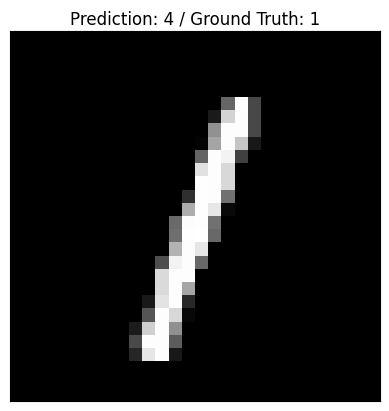

In [ ]:
# Пропустим рандомное изображение из MNIST через нашу еще необученную модель:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
X, Y = training_data[sample_idx]
X = X.to(device)

# Forward pass:
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
Y_pred = pred_prob.argmax(1)

print('Ненормализованные вероятности:\n', logits.cpu().detach())
print('Нормализованные вероятности:\n', pred_prob.cpu().detach())
text = f"Prediction: {Y_pred.item()} / Ground Truth: {Y}"
show(X.cpu().squeeze(), title=text)

In [ ]:
# Функция для обучения модели:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Делаем предсказания:
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# Функция для тестирования обученной модели:
def test(dataloader, model, loss_fn, verbose=True, iterations=None):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for i, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            if iterations is not None and i >= iterations:
                break

    test_loss /= num_batches
    correct /= size
    if verbose:
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Adam — adaptive moment estimation, ещё один оптимизационный алгоритм. Он сочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков.

In [ ]:
# Инициализируем модель и data loaders:
# model = model_LR2().to(device)
# model = NeuralNetworkSeq().to(device)
model = NeuralNetwork().to(device)
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Задаем гиперпараметры:
epochs = 5
batch_size = 64
lr = 1e-3

# Выбираем функцию потерь и оптимайзер:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999))
# betas - параметры, управляющие накоплением и обновлением весов

# Обучаем 5 эпох (эпоха - один проход по всем данным):
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.311154  [    0/60000]
loss: 0.344068  [ 6400/60000]
loss: 0.249798  [12800/60000]
loss: 0.298656  [19200/60000]
loss: 0.218008  [25600/60000]
loss: 0.308889  [32000/60000]
loss: 0.167014  [38400/60000]
loss: 0.335824  [44800/60000]
loss: 0.363227  [51200/60000]
loss: 0.240217  [57600/60000]
Test Error: 
 Accuracy: 94.6%, Avg loss: 0.171479 

Epoch 2
-------------------------------
loss: 0.091908  [    0/60000]
loss: 0.209842  [ 6400/60000]
loss: 0.090612  [12800/60000]
loss: 0.181715  [19200/60000]
loss: 0.141198  [25600/60000]
loss: 0.193059  [32000/60000]
loss: 0.092721  [38400/60000]
loss: 0.275122  [44800/60000]
loss: 0.242411  [51200/60000]
loss: 0.169237  [57600/60000]
Test Error: 
 Accuracy: 96.4%, Avg loss: 0.114484 

Epoch 3
-------------------------------
loss: 0.048314  [    0/60000]
loss: 0.112177  [ 6400/60000]
loss: 0.080257  [12800/60000]
loss: 0.123007  [19200/60000]
loss: 0.077923  [25600/60000]
loss: 0.121023  [32000/600

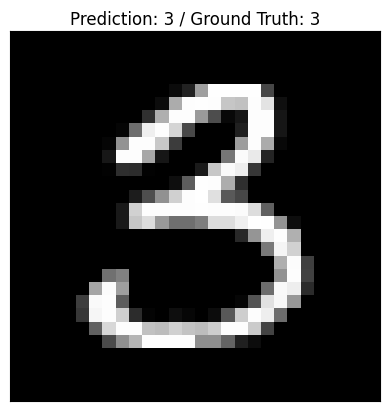

In [ ]:
# Опишем название классов:
classes = ['0','1','2','3','4','5','6','7','8','9']

sample_idx = torch.randint(len(test_data), size=(1,)).item()
x, y = test_data[sample_idx][0], test_data[sample_idx][1]
x = x.to(device)

model.eval()
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    text = f"Prediction: {predicted} / Ground Truth: {actual}"
    show(x.cpu().squeeze(), title=text)

In [ ]:
# Обучим сверточную сеть

import torch.nn.functional as F     # imports activation functions

class CNN(nn.Module):
    def __init__(self, out_size):
        super(CNN, self).__init__()
        # Describe layers:
        self.conv1 = nn.Conv2d(1, 32, 3, 1)     # 1: in channels, 32: out channels, 3: kernel size, 1: stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)         # 9216: in channels, 128: out channels
        self.fc2 = nn.Linear(128, out_size)

    # Forward propagation:
    def forward(self, x):
        '''
        x reprenets our input data
        '''
        # Pass data through conv's layers:
        x = self.conv1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        # Run max pooling over x:
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)

        # Flatten x with start_dim=1
        x = torch.flatten(x, 1)

        # Pass data through FC's layers:
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        return x

cnn_model = CNN(10).to(device)
print(cnn_model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Инициализируем модель и data loaders:
cnn_model = CNN(10).to(device)
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Задаем гипперпараметры:
epochs = 1
batch_size = 64
lr = 1e-3

# Выбираем функцию потерь и оптимайзер:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(cnn_model.parameters(), lr=lr, momentum=0.9)
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=lr, betas=(0.9, 0.999))

# Обучаем 1 эпохe:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, cnn_model, loss_fn, optimizer)
    test(test_dataloader, cnn_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.294139  [    0/60000]
loss: 0.483810  [ 6400/60000]
loss: 0.186527  [12800/60000]
loss: 0.224657  [19200/60000]
loss: 0.109345  [25600/60000]
loss: 0.300146  [32000/60000]
loss: 0.128271  [38400/60000]
loss: 0.198532  [44800/60000]
loss: 0.239026  [51200/60000]
loss: 0.257474  [57600/60000]
Test Error: 
 Accuracy: 97.9%, Avg loss: 0.069489 

Done!
